In [1]:
#Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC 

In [2]:
#Loading the files
train_data=pd.read_csv("Data_1.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"],engine="python")
test_data=pd.read_csv("Data_2.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"],engine="python")
test_data_solution=pd.read_csv("Data_3.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"],engine="python")
#Displaying the training dataset
display(train_data.head())
#Displaying the testing dataset 
display(test_data.head())
#Displaying the testing solution dataset 
display(test_data_solution.head())

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",NaN
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",NaN
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,NaN
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",NaN
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,NaN


,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


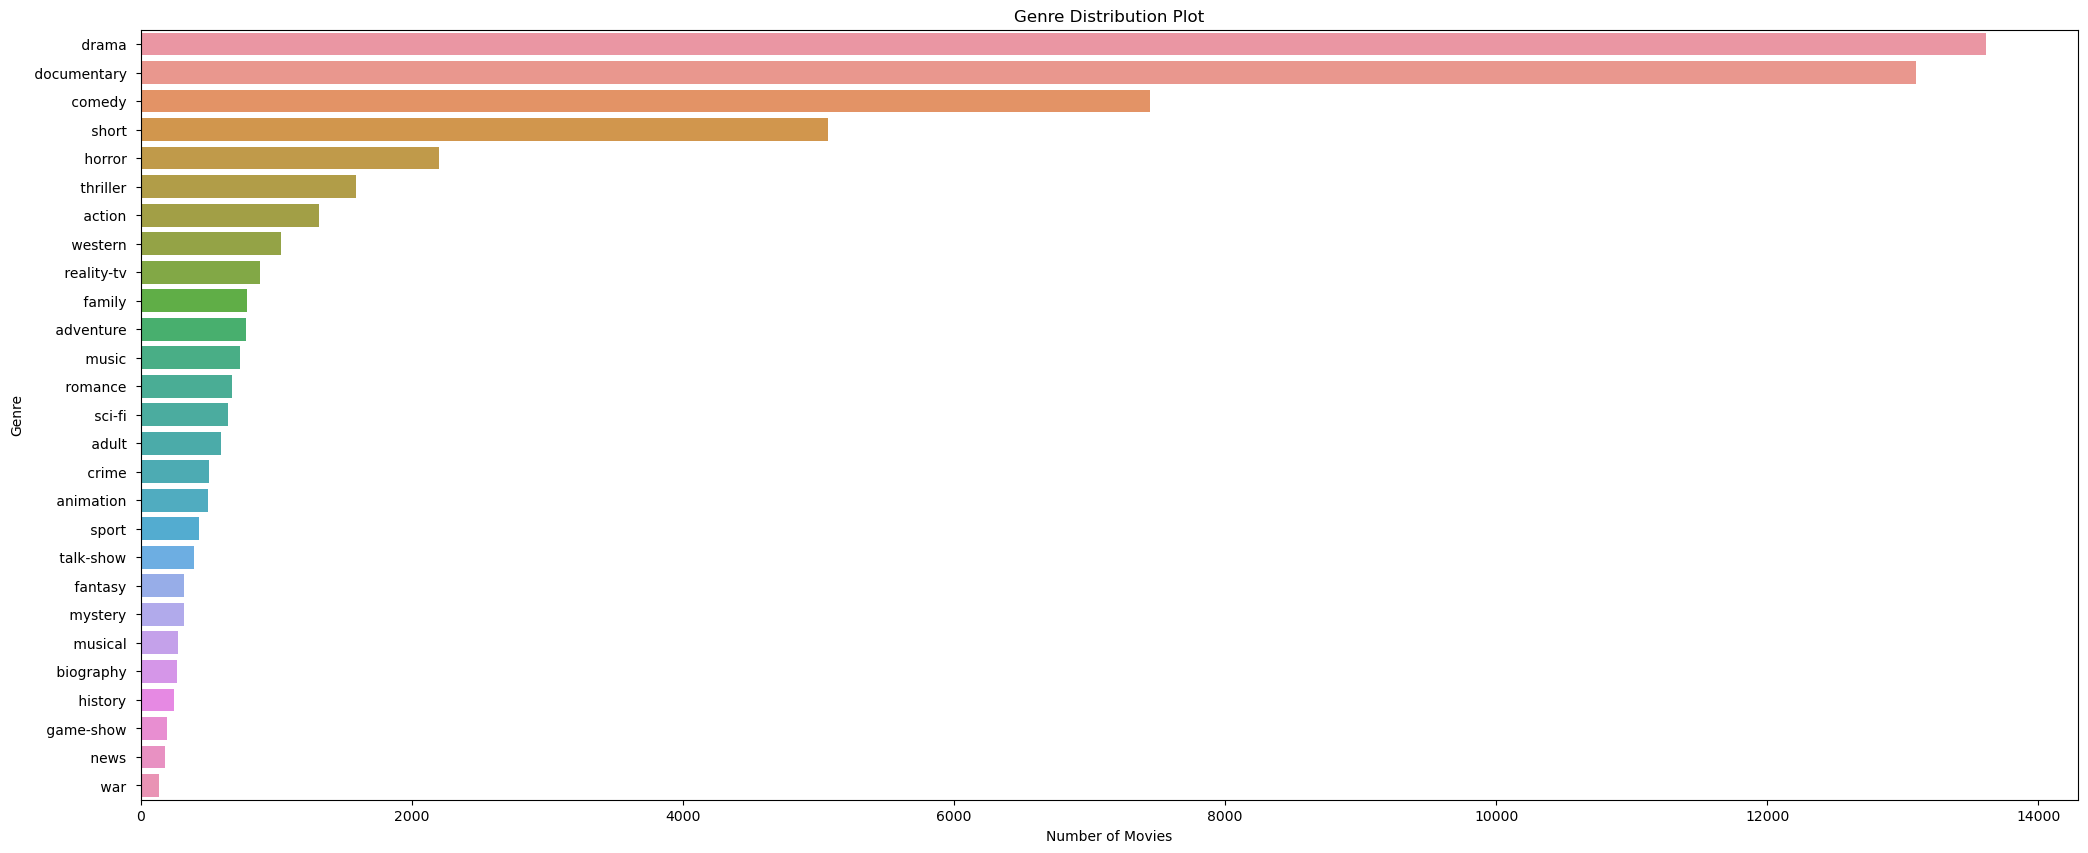

In [3]:
#Displaying the genre distribution
plt.figure(figsize=(25,10))
sns.countplot(y=train_data["GENRE"],order=train_data["GENRE"].value_counts().index)
plt.title("Genre Distribution Plot")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

In [4]:
#Filling in the empty column
train_data["DESCRIPTION"].fillna("",inplace=True)
test_data['DESCRIPTION'].fillna("",inplace=True)
#Initializing the vectorizer
t_v=TfidfVectorizer(stop_words="english",max_features=100000)
x_train=t_v.fit_transform(train_data["DESCRIPTION"])
x_test=t_v.transform(test_data["DESCRIPTION"])
#Initializing the label encoder
label_encoder=LabelEncoder()
y_train=label_encoder.fit_transform(train_data["GENRE"])
y_test=label_encoder.transform(test_data_solution["GENRE"])

In [5]:
#Splitting the dataset
train,test=train_test_split(train_data,test_size=0.2)

In [6]:
#Building the linear support vector classifier model
model=LinearSVC(dual=True)
model.fit(x_train,y_train);

In [7]:
y_pred=model.predict(x_test)
y_test=y_test.reshape(-1,1)
y_pred=y_pred.reshape(-1,1)
test_accuracy=(1000*metrics.accuracy_score(y_test,y_pred))
#Displaying the testing accuracy
print(f"Testing Accuracy:{test_accuracy:6.2f}%")

Testing Accuracy: 93.58%


In [8]:
def prediction(description):
    #Transforming the description
    t_v_1=t_v.transform([description])
    #Predicting the label for the description
    pred_label=model.predict(t_v_1)
    return label_encoder.inverse_transform(pred_label)[0]
#First sample description
desc_1="A movie depicting the journey of a young boy who after being bitten by a spider,gains extraordinary abilities.With his newfound powers he embarks on a mission to protect and save people."
print(prediction(desc_1))
#Second sample description
desc_2="A movie where a family moves into a new apartment and starts to experience paranormal activites."
print(prediction(desc_2))

 action 
 horror 
